# Covid-19 infección en Ecuador. Modelos probabilisticos

In [1]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2020-05-21,99483,492.0,15.0,165.0,1.0,2.0,0.0,0.0,474.0,...,0.0,8.0,70.0,0.0,75.0,0.0,0.0,13.0,60.0,2.0
143,2020-05-22,107909,531.0,5.0,186.0,0.0,6.0,0.0,0.0,648.0,...,0.0,3.0,56.0,0.0,58.0,0.0,0.0,13.0,34.0,3.0
144,2020-05-23,106570,540.0,12.0,190.0,0.0,2.0,0.0,0.0,718.0,...,0.0,4.0,72.0,0.0,62.0,0.0,0.0,12.0,54.0,5.0
145,2020-05-24,101131,782.0,8.0,195.0,0.0,0.0,0.0,0.0,704.0,...,0.0,11.0,54.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [3]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
142,141,703.0
143,142,452.0
144,143,522.0
145,144,430.0


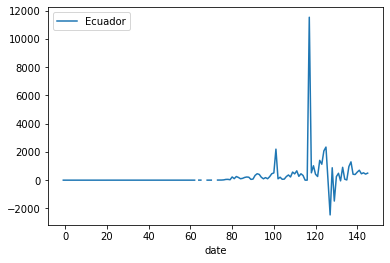

In [4]:
df.plot(x ='date', y='Ecuador')

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.

In [5]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
print(filtro)
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


61       1.0
62       5.0
63       1.0
64       NaN
65       3.0
       ...  
142    703.0
143    452.0
144    522.0
145    430.0
146    498.0
Name: Ecuador, Length: 86, dtype: float64
225.0
453.77777777777777


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [6]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
df_t = df_t.replace(np.nan, 0)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)

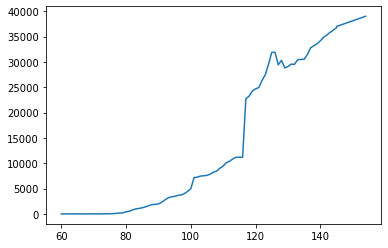

cuantos contagiados mas: 39016


In [7]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

print('cuantos contagiados mas:',y[-1]+10)

# Practica
1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

**1. Comparar el modelo de predicion matematico vs probabilidad.**

Modelo Probabilistico
total de casos + mediada:  36981
actual: 11183.0
cuantos contagiados más en una semana: 38338


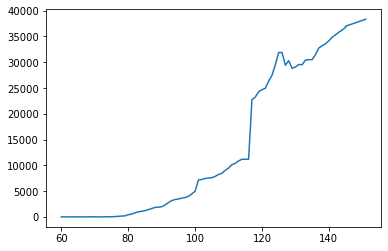

In [8]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
df_t = df_t.replace(np.nan, 0)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print('Modelo Probabilistico')
print('total de casos + mediada: ',prediccion_siguiente)
print('actual:',y[115])
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))

print('cuantos contagiados más en una semana:',y[-1]+7)

plt.plot(x[61:], y[61:])
plt.show()


actual: 21523 contagiados


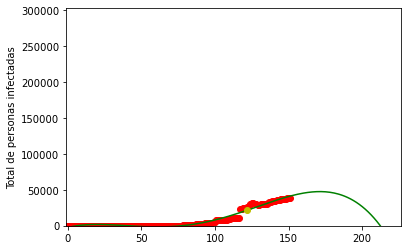

In [9]:
#Implementar
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 4)    # usaremos polinomios de grado 6
X = pf.fit_transform(np.array(x).reshape(-1, 1))

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+100))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
print ('actual:', int(prediccion_entrenamiento[122]), 'contagiados')
#print( x)

plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.ylim((-300,max(y)*7.9))
plt.xlim((min(x)*0.9,max(x)*1.5))
plt.ylabel("Total de personas infectadas")
plt.plot(122,prediccion_entrenamiento[122], 'oy')
plt.show()

**2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.**

S0: 39999 	I0: 1 	R0: 0

 beta=0.32160000, gamma=0.22450000, R0:1.43251670


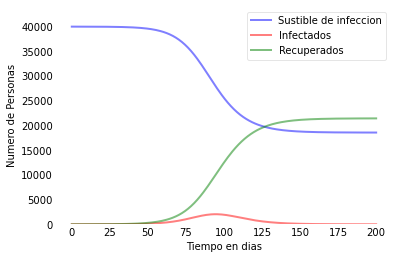

In [10]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import argparse
import sys
import json
import ssl
import urllib.request
class Learner(object):
    def __init__(self, country, loss, start_date,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0
    
    def train(self):
        data = y
        self.i0=data
        optimal = minimize(loss, [0.001, 0.001], args=(data, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.3216), (0.00000001, 0.2245)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        print(f"\n beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")

def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

N=40000
i0=1
r0=0
s0=N - i0 - r0
print('S0:',s0,'\tI0:',i0,'\tR0:',r0)
learner = Learner('Ecuador', loss, '1/1/2020', s0, i0, r0)
learner.train()

beta, gamma = learner.Beta, learner.Gamma
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = s0, i0, r0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

**3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.**

Media una semana antes: 448.4054054054054
Mediana una semana antes: 206.5
Predicion una semana antes:  33388
33388
33594.5
33801.0
34007.5
34214.0
34420.5
34627.0


<function matplotlib.pyplot.show(*args, **kw)>

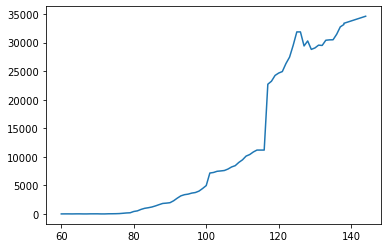

In [11]:
SemanaAntes=df['Ecuador'][61:len(df)-7]
y_semanantes = list(df_t.iloc [:, 1]) # Total casos
x_semanantes = list(df_t.iloc [:, 0]) # Dias
for i in range (7):
    y_semanantes.pop(-1)
    x_semanantes.pop(-1)
#Mediana
media_semanantes=SemanaAntes.mean()
print('Media una semana antes:', media_semanantes)
mediana_semanantes=SemanaAntes.median()
print('Mediana una semana antes:', mediana_semanantes)


#Realizamos un ejemplo de prediccion
prediccion_semana_antes = int(y_semanantes[-1] + mediana_semanantes)
print('Predicion una semana antes: ',prediccion_semana_antes)

for i in range(x_semanantes[-1], x_semanantes[-1]+7):
    x_semanantes.append(i)
    y_semanantes.append(int(y_semanantes[-1]+mediana_semanantes))
    
for i in range(7):
    print(prediccion_semana_antes)
    prediccion_semana_antes=prediccion_semana_antes+mediana_semanantes
    
plt.plot(x_semanantes[61:], y_semanantes[61:])
plt.show

Predicción una semana antes: 11825 contagiados


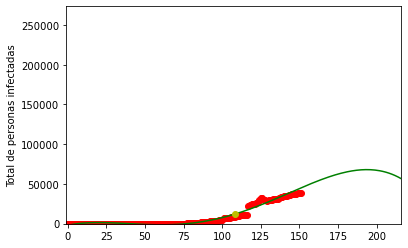

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 4)    # usaremos polinomios de grado 6
X = pf.fit_transform(np.array(x_semanantes).reshape(-1, 1))

regresion_lineal = LinearRegression()
regresion_lineal.fit(X,y_semanantes ) 

pred_x = list(range(0,max(x_semanantes)+200))
puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
print ('Predicción una semana antes:', int(prediccion_entrenamiento[108]), 'contagiados')
plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.ylim((-300,max(y_semanantes)*7.9))
plt.xlim((min(x_semanantes)*0.9,max(x_semanantes)*1.5))
plt.ylabel("Total de personas infectadas")
plt.plot(108,prediccion_entrenamiento[108], 'oy')
plt.show()

## Analisis
El modelo  Polinomial, se trata de un modelo lineal en el que se incorporan nuevos predictores elevando el valor de los casos ya existentes a diferentes potencias. por lo que un polinomio de cuarto grado podría capturar mejor la relación entre las variables.
Los pronósticos probabilísticos pueden aplicarse a muchos ámbitos, que van desde el pronóstico del tiempo hasta las apuestas deportivas, pero son especialmente útiles para la optimización de la cadena de suministro.

## Conclusiones
Si tomame en cuenta la predicción del modelo de probabilidad a  una semana la tasa de contagiados es baja si tomamos en cuenta como va creciento en número de contagidos día a día, en cambio el modelo matemático polimonial, se acerca más, si consideramos como de un día para otro el número de contagias crece y en una semana es mucho más.
El modelo SIR muestra que la tasa de contagiados crece rápidamente, se debe tener en cuenta que la población es la correcta, pero modela lo que estamos calculando.
Los dos modelos tanto de probabiliad, matemático consecutivamente, en cuento, a sacar el número de contagiados en una semena atrás  tiene cierto parecido,  es decir, si se acercan al número de contagiados reales que se tiene en el documentos que estamos haciendo uso para este análisis. Si comparamos los datos de nos devuelven los modelos y los datos del docuento hace una semana son  los mismos. 

## Criterio personal (politico, economico y  social de la situacion)
Evidentemente el factor político juega un papel fundandamtal en el; control de focos de infección, organización social, respuesta a posibles problemas sociales y/o ecónimicos, programas de organización y solventación ecónomica. De la pronta y acertada respuesta gubernamental dependerá la situación general del país, sin embargo, Ecuador, es el país más afectado de toda la región, esto evidencia el caos e inenptitud de las autoridades al momento de reaccionar y actuar, en consecuencia, se observa el colpaso de los sistemas sociopliticos del país, lo que conlleva a una grave desorientación social, pudiendo esta, ser un problema de gran peso agregado a la ya fatídica e incotrlable situación, esto, nos abliga como ciudadonos críticos a reepemzar sobre nuestro accionar y tener mucho cuidado con la información que creamos y recibimos.   


**Garay Largo Lucy Marisol.**

# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/